> *"Student Id: 1820345."*

> *"Student Name : Fergus Mc Hale"*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

Suggestion: try PLA on this dataset before using the bank dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [48]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [5]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [7]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

In [6]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

In [8]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

# Task 1
# Load bank.csv into a Pandas dataframe. Examine the first few data rows and the last few data rows. Identify an attribute that can be the target/dependable variable for 2-class classification.

In [9]:
CSV_SPLIT = ','

In [10]:
data = pd.read_csv('./data/bank_et1.csv',sep=CSV_SPLIT, delimiter=None)

In [11]:
del data['Unnamed: 0'] #Drop Column not relevent to dataset

# Task 2
# Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis.ipynb” to perform EDA of the bank data set.

In [12]:
data.isnull().sum() #Check for null values in field

age               0
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

# The following fields contain null values that have been replaced with values
# Job : 10
# Education : 104
# contact  : 191
# poutcome : 454
# These have been replaced to say unknown

In [13]:
data["poutcome"].fillna("unknown", inplace = True) #Replace null values

In [14]:
data["education"].fillna("unknown", inplace = True)

In [15]:
data["job"].fillna("unknown", inplace = True)

In [16]:
data["contact"].fillna("unknown", inplace = True)

# Calculate statistics for the numerical and categorical attributes.

In [17]:
data.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


# The age range is between 18 and 93 with the minimum age being 18
# The balance is can range from minus 980 to 8k with the minimum balance being in the negative
# A campaign can range in duration of between 1 and 11 days with the mimimum day of being one
# The payment days can be behind one day or max be 854 days with the mimimum of being a day behind in payment
# The duration can be between 7 days and 1,823 days

In [18]:
data.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [19]:
data.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,unknown,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,unknown,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,unknown,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,unknown,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,unknown,20,sep,185,1,-1,0,unknown,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,unknown,yes


In [20]:
age_frequency_table = data['age'].value_counts().nlargest(20)

In [21]:
print(age_frequency_table)

33    95
35    91
31    87
34    85
37    78
32    77
36    74
38    66
30    65
29    60
28    59
39    56
46    54
40    50
45    46
27    44
43    44
41    43
49    42
48    41
Name: age, dtype: int64


# The age of the group is slightly biased in that there isnt an even spread across the age groups.
# This should be more clearer in graphs

In [22]:
data['balance'].value_counts().nlargest(20)

0      86
1       9
272     8
303     7
4       6
6       6
655     6
393     6
557     6
417     6
496     5
105     5
205     5
62      5
372     5
392     5
5       5
224     4
985     4
129     4
Name: balance, dtype: int64

# There are 86 people who dont have a balance within their account
# 9 individuals only have a balance of 1 in their account.
# 5 individuals only have a balance of 5 in their account with 6 individuals only having a balance of 4 in their account
# The balance is slighly skewed to going upwards from 100

In [23]:
data['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
unknown           10
Name: job, dtype: int64

# A large proporation of population are in management, technical or blue collar jobs explaining that their balance is slightly higher compared to assumed lower income groups

In [24]:
data['education'].value_counts()

secondary    995
tertiary     684
primary      217
unknown      104
Name: education, dtype: int64

# A large proportion of the population have received secondary education with a 1/3 of the cohort from secondary not considering to go onto third level education

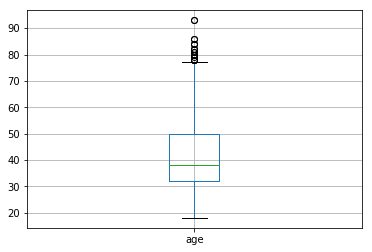

In [25]:
data.boxplot(column='age')

In [26]:
data['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

# A large proportion of the population dont have a house.

Text(0, 0.5, 'Count')

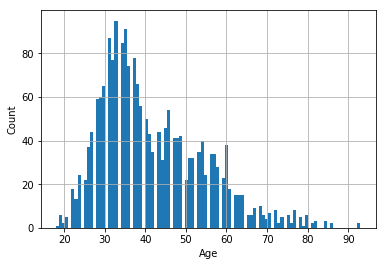

In [27]:
data['age'].hist(bins=99)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# A large proporation of the population are in between 32 and 50. This is biased based on age not including an even distribution across the 60,70,80,90 range

# The dataset varies with one individual in the 80's range having a balance of ~80K to a individual in the 95 range having a balance of 0. In between there are 2 individuals between the ranges 70 - 80 having a balance of ~25k.
# There is 1 individual between  50 - 60 having a similar balance of ~25k.
# There is 1 individual of age of 49 having 20k
# There is 1 individual having a ~45 having 30k
# There is 1 individual age of (~32,~42) having a balance of ~25 - ~28k
# There is a small number of samples in 70,80,90 range which is concerning as not an evenly distributed dataset based on age

Text(0.5, 0.98, '')

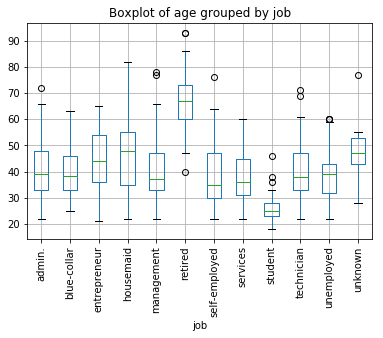

In [34]:
data.boxplot(column='age', by='job')
plt.title('Boxplot of age grouped by job')
plt.xticks(rotation=90)
plt.suptitle("")
plt.show()

# The Job Range is 
# Adminstrators are between ~32 and ~48 with median of ~39
# blue collar workers are between ~33 and ~45 with median a year or two behind admins
# entrpreneurs are between ~36 and ~55 with median between ~45
# housemaids are between ~35 and ~55 with median of 48
# managment are between ~33 and ~48 with median of 34
# retired are between ~60 and ~73 with median of 66
# self employed are between ~30 and ~48 with median of ~34
# services are between ~31 and 44 median of 35
# students are between ~25 and ~29 with median of ~25


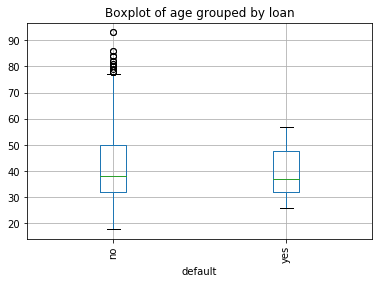

In [50]:
data.boxplot(column='age', by='default')
plt.title('Boxplot of age grouped by loan')
plt.xticks(rotation=90)
plt.suptitle("")
plt.show()

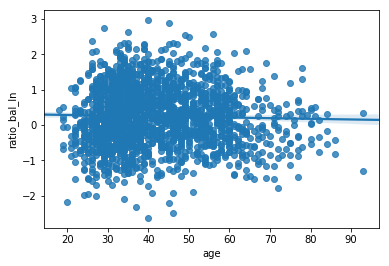

In [36]:
sns.regplot(x='age', y='ratio_bal_ln', data=data)

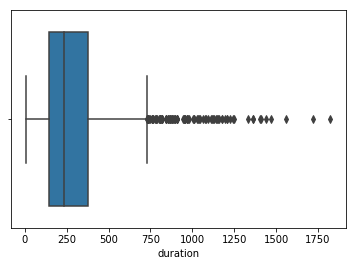

In [38]:
sns.boxplot(x=data['duration'])

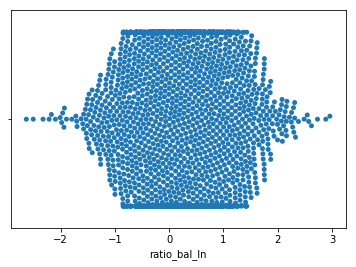

In [45]:
sns.swarmplot(x=data['ratio_bal_ln'])

# Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

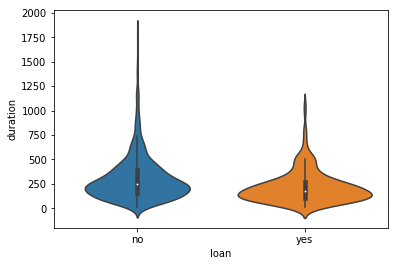

In [40]:
sns.violinplot(x='loan', y='duration', data=data)

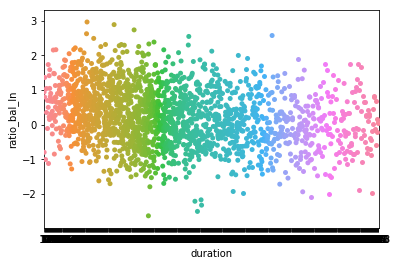

In [43]:
sns.stripplot(x="duration", y="ratio_bal_ln", data=data)

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=t)

# Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.
# You won't find two numerical attributes that will perfectly classify a dependent variable. Pick the best you can find.

# Task 3
# Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:

* Input space X
* Output space Y
* Unknown target function f : X -> Y
* Data set (historical records of bank) data
* Hypothesis set H (Set of Candidate Formulas)
* Final Hypothesis g = f 
* In-sample error Ein(g)
* Out-of-sample error Eout(g)

# PT[Ein(h) - Eout(h)] |> e] <= 2e-2e^2N

# Task 4

![The Learning Diagram]( .\images\LearningDiagramplusnoise.jpg "The Learning Diagram")

# Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

# HINT: The videos discuss the 'Pocket' algorithm as an improvement on the PLA. 

> *"Pocket Algorithm : Take the best result and put in 'pocket' keep the best solution. when you get a better one throw it and keep new one. NOTE: PLA but just has memory"*

#### References
* [1] [Implementing PLA] (https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/)
* [2] [Reference Slides] (http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect02.pdf)